In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

import astropy.io.fits as fits

import glob

import os

from photutils.aperture import EllipticalAperture
from photutils.aperture import EllipticalAnnulus
from photutils import aperture_photometry

from matplotlib.colors import LogNorm

# Starting with M101:

In [2]:
# filepath just for M101 observations:

filepath = glob.glob('./fits/ARCSAT/5-19/M49*.fits')

In [3]:
# getting copies of data and headers for M49; prints filenames as well as headers for first two:

data_array = []
header_array = []

for file in filepath:

    hdu = fits.open(file)
    data_array.append(hdu[0].data.copy())
    header_array.append(hdu[0].header.copy())
    print(os.path.basename(file))

hdu.close()
header_array[0]

M49_halpha_20180520_043609.fits
M49_sdss_g_20180520_032008.fits
M49_sdss_g_20180520_032646.fits
M49_sdss_g_20180520_033454.fits
M49_sdss_i_20180520_040512.fits
M49_sdss_r_20180520_034825.fits
M49_sdss_z_20180520_041554.fits


SIMPLE  =                    T                                                  
BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     
NAXIS   =                    2 /number of axes                                  
NAXIS1  =                 4096 /fastest changing axis                           
NAXIS2  =                 4096 /next to fastest changing axis                   
BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           
BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           
DATE-OBS= '2018-05-20T04:36:22' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   7.50000000000E+002 / [sec] Duration of exposure                     
EXPOSURE=   7.50000000000E+002 / [sec] Duration of exposure                     
SET-TEMP=  -31.399999618530273 /CCD temperature setpoint in C                   
CCD-TEMP=  -29.018484000000001 /CCD temperature at start of exposure in C       
XPIXSZ  =   9.00000000000000

In [4]:
plt.style.use('default')

In [5]:
from astropy.visualization import make_lupton_rgb

# Okay now to import the biases and flats:

In [6]:
# Night 1 Bias Filepath:

filepath2 = glob.glob('./fits/ARCSAT/5-19/Bias*.fits')

In [7]:
# Retrieves night 1 bias stuff; prints filenames & returns avg. bias count.

biasdata_array = []
biasheader_array = []
bias_avgs = []
superbias = []

for file in filepath2:

    hdu1 = fits.open(file)
    biasdata_array.append(hdu1[0].data.copy())
    biasheader_array.append(hdu1[0].header.copy())
    print(os.path.basename(file))
    bdata = fits.getdata(file)
    bias_avgs.append(np.mean(bdata))

super_bias = np.mean(bias_avgs)

hdu1.close()
print(super_bias)

Bias_BIN1_20180520_082435.fits
Bias_BIN1_20180520_082510.fits
Bias_BIN1_20180520_082533.fits
Bias_BIN1_20180520_082555.fits
Bias_BIN1_20180520_082622.fits
1131.0744609951973


In [8]:
# Filepath for night 1 dome flats.

filepath3 = glob.glob('./fits/ARCSAT/5-19/domeflat*.fits')

In [9]:
# Getting dome flat stuff:

domeflatdata_array = []
domeflatheader_array = []

for file in filepath3:

    hdu2 = fits.open(file)
    domeflatdata_array.append(hdu2[0].data.copy())
    domeflatheader_array.append(hdu2[0].header.copy())
    print(os.path.basename(file))

hdu2.close()

domeflat_halpha_001.fits
domeflat_sdss_g_001-2.fits
domeflat_sdss_g_002-2.fits
domeflat_sdss_g_003-2.fits
domeflat_sdss_i_001.fits
domeflat_sdss_i_002.fits
domeflat_sdss_i_003.fits
domeflat_sdss_r_001.fits
domeflat_sdss_r_002.fits
domeflat_sdss_r_003.fits
domeflat_sdss_z_001.fits


In [10]:
# sdss_i avg. flat count:

iflat_avg = np.mean(domeflatdata_array[4:7])
print(iflat_avg)

19478.75809923808


# Now for actual data reduction (of M49):

In [11]:
# subtract biases - from everything,
# divide flats

In [12]:
from sklearn.preprocessing import normalize

In [13]:
# making average i band flat:

i_avg_flats = (domeflatdata_array[4] + domeflatdata_array[5] + domeflatdata_array[6])/3

In [14]:
i_avg_flats_minusbias = i_avg_flats - super_bias

In [15]:
# normalizing i band flat:

n2_domeflatnorm_i = normalize(i_avg_flats_minusbias)

In [16]:
reduced_i_M49 = (data_array[4] - super_bias)/(n2_domeflatnorm_i)

In [17]:
r_avg_flats = (domeflatdata_array[7] + domeflatdata_array[8] + domeflatdata_array[9])/3

In [18]:
rflat_minusbias = r_avg_flats - super_bias

In [19]:
n2_domeflatnorm_r = normalize(rflat_minusbias)

In [20]:
reduced_r_M49 = (data_array[5] - super_bias)/(n2_domeflatnorm_r)

In [21]:
# g band

g_avg_flats_minusbias = ((domeflatdata_array[1] + domeflatdata_array[2] + domeflatdata_array[3])/3) - super_bias

n2_domeflatnorm_g = normalize(g_avg_flats_minusbias)

reduced_g_M49 = (data_array[3] - super_bias)/(n2_domeflatnorm_g)

In [22]:
# z band

z_avg_flats_minusbias = domeflatdata_array[10] - super_bias

n2_domeflatnorm_z = normalize(z_avg_flats_minusbias)

reduced_z_M49 = (data_array[6] - super_bias)/(n2_domeflatnorm_z)

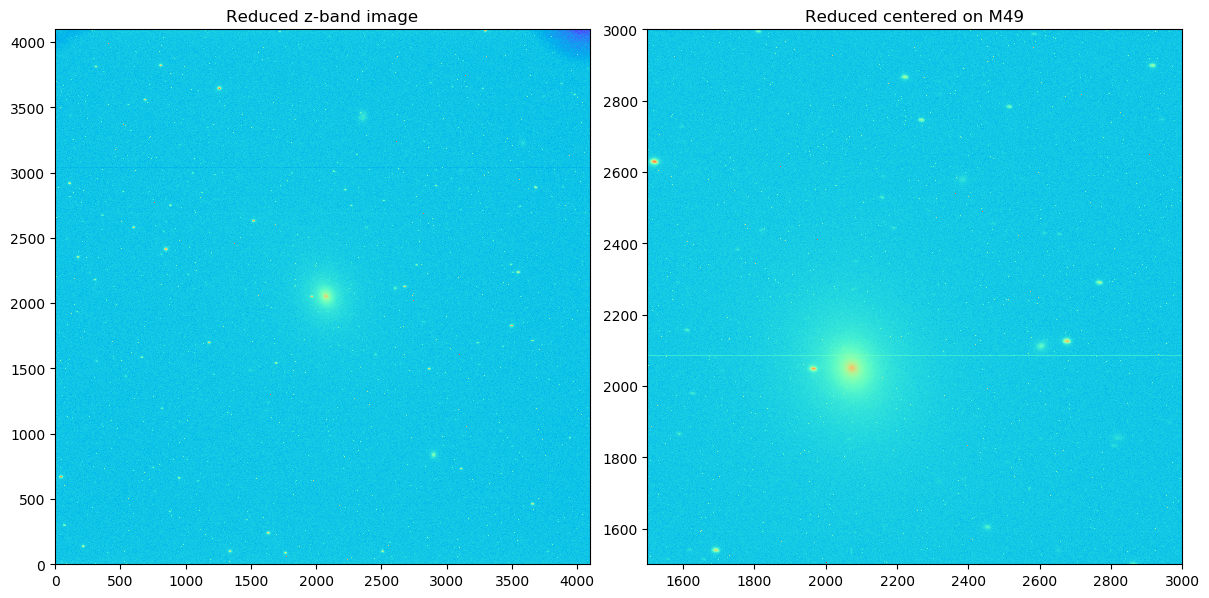

In [23]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_z_M49, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_z_M49, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced z-band image')
ax[1].set_title('Reduced centered on M49');

In [24]:
halpha_avg_flats_minusbias = domeflatdata_array[0] - super_bias

n2_domeflatnorm_halpha = normalize(halpha_avg_flats_minusbias)

reduced_halpha_M49 = (data_array[0] - super_bias)/(n2_domeflatnorm_halpha)

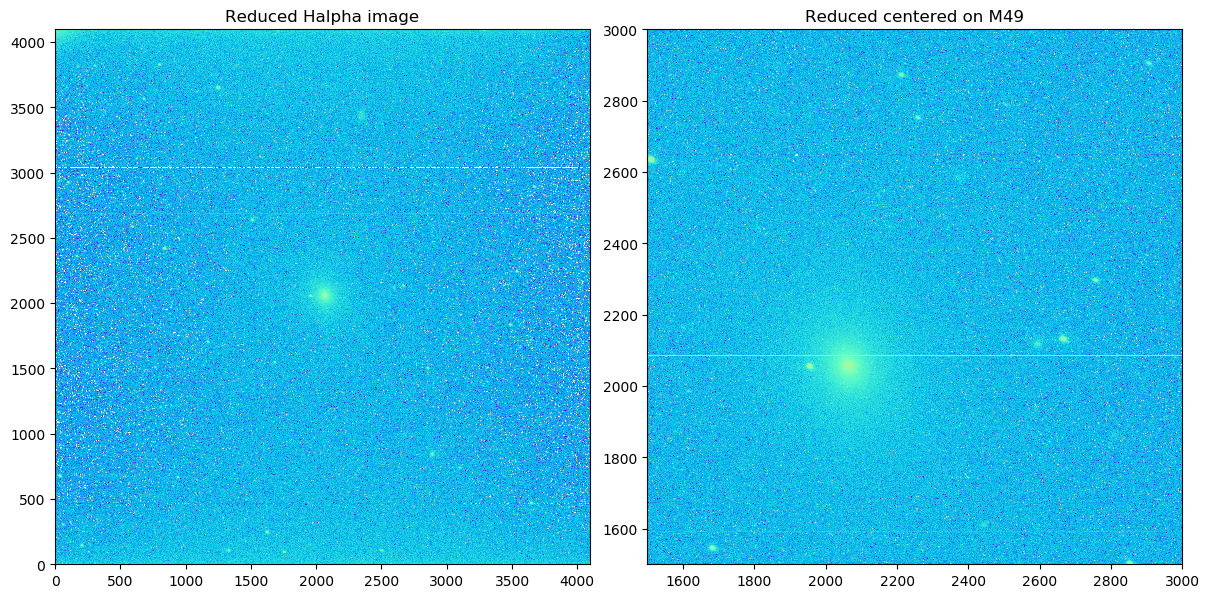

In [25]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_halpha_M49, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_halpha_M49, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced Halpha image')
ax[1].set_title('Reduced centered on M49');

# Now for sky-subtraction:

In [26]:
coord = [2051.134, 2053.268]

In [27]:
ApertureScience = EllipticalAperture(coord, a=500, b=435, theta=1.7)

In [28]:
ap_pho = aperture_photometry(reduced_i_M49, ApertureScience, method='exact')
ap_pho

<QTable length=1>
  id  xcenter  ycenter     aperture_sum  
        pix      pix                     
int64 float64  float64       float64     
----- -------- -------- -----------------
    1 2051.134 2053.268 7779322202.968692

In [29]:
count = []

count_a = ap_pho['aperture_sum']
count_per_area = (count_a / (ApertureScience.area())) # counts / pixel squared
count.append(count_per_area)
print(count)

[<Column name='aperture_sum' dtype='float64' length=1>
11384.989264432184]


In [30]:
# That can be right.

In [31]:
coord2 = [540.906, 3200.755]

In [32]:
ApertureCircle = EllipticalAperture(coord2, a=5, b=5, theta=0)

In [33]:
circle_pho = aperture_photometry(reduced_i_M49, ApertureCircle, method='exact')

In [34]:
sky_count = []

count_sky = circle_pho['aperture_sum']
sky_count_per_area = (count_sky / (ApertureCircle.area())) # counts / pixel squared
sky_count.append(sky_count_per_area)
print(sky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
7300.715986765348]


In [35]:
skyless_i = reduced_i_M49 - sky_count

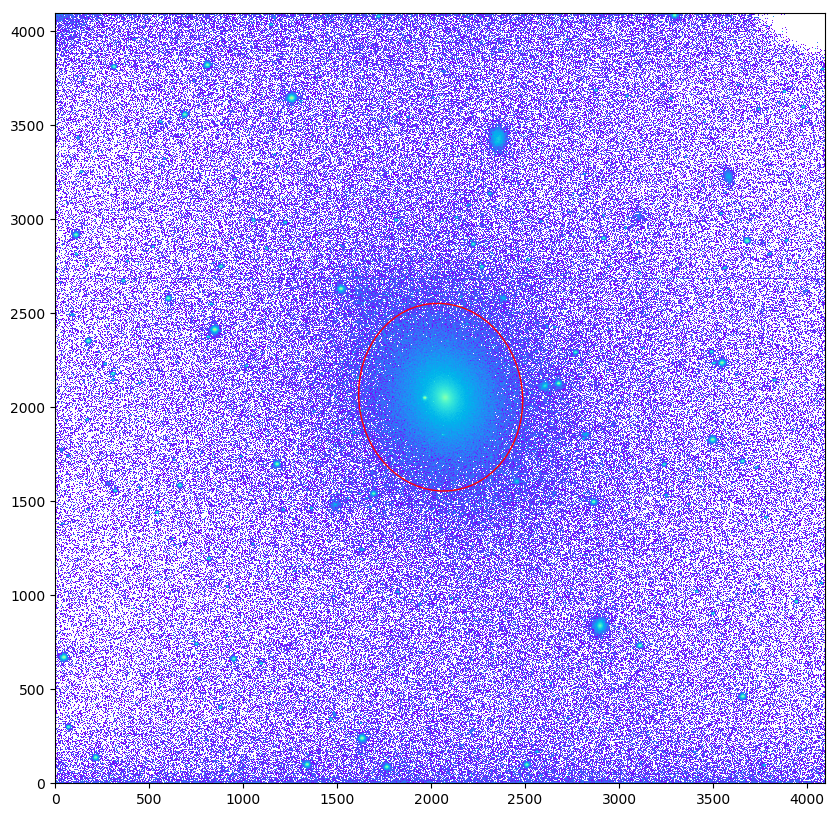

In [36]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(skyless_i, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', origin='lower')
EllipticalAperture.plot(ApertureScience, color="r");

In [37]:
# g band

In [38]:
gcircle_pho = aperture_photometry(reduced_g_M49, ApertureCircle, method='exact')

In [39]:
gsky_count = []

gcount_sky = gcircle_pho['aperture_sum']
gsky_count_per_area = (gcount_sky / (ApertureCircle.area())) # counts / pixel squared
gsky_count.append(gsky_count_per_area)

In [40]:
skyless_g = reduced_g_M49 - gsky_count

In [41]:
# r band

In [42]:
rcircle_pho = aperture_photometry(reduced_r_M49, ApertureCircle, method='exact')

In [43]:
rsky_count = []

rcount_sky = rcircle_pho['aperture_sum']
rsky_count_per_area = (rcount_sky / (ApertureCircle.area())) # counts / pixel squared
rsky_count.append(rsky_count_per_area)

In [44]:
skyless_r = reduced_r_M49 - rsky_count

In [45]:
# zed band

In [46]:
zcircle_pho = aperture_photometry(reduced_z_M49, ApertureCircle, method='exact')

In [47]:
zsky_count = []

zcount_sky = zcircle_pho['aperture_sum']
zsky_count_per_area = (zcount_sky / (ApertureCircle.area())) # counts / pixel squared
zsky_count.append(zsky_count_per_area)

In [48]:
skyless_z = reduced_z_M49 - zsky_count

In [49]:
# H alpha

In [50]:
hacircle_pho = aperture_photometry(reduced_halpha_M49, ApertureCircle, method='exact')

In [51]:
hasky_count = []

hacount_sky = hacircle_pho['aperture_sum']
hasky_count_per_area = (hacount_sky / (ApertureCircle.area())) # counts / pixel squared
hasky_count.append(hasky_count_per_area)

print(hasky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
1030.9621385871253]


In [52]:
skyless_halpha = reduced_halpha_M49 - hasky_count

In [53]:
# making apertures (note: as above plot shows, actual aperture could use some work):

In [54]:
zap_pho = aperture_photometry(skyless_z, ApertureScience, method='exact')
gap_pho = aperture_photometry(skyless_g, ApertureScience, method='exact')
iap_pho = aperture_photometry(skyless_i, ApertureScience, method='exact')
rap_pho = aperture_photometry(skyless_r, ApertureScience, method='exact')
hap_pho = aperture_photometry(skyless_halpha, ApertureScience, method='exact')

In [55]:
elliptical_apertures = [hap_pho, gap_pho, rap_pho, iap_pho, zap_pho]

In [56]:
ap_keys = ['Ha', 'g', 'r', 'i', 'z']

for aperture in elliptical_apertures:
    print(aperture['aperture_sum'])

   aperture_sum   
------------------
401267253.43727577
   aperture_sum  
-----------------
2607103287.859372
   aperture_sum   
------------------
3674526131.7671313
   aperture_sum  
-----------------
2790769236.050743
   aperture_sum   
------------------
2231261910.4899545


# Also M100 as it's only two filters so doesn't take up a whole notebook's worth of space:

In [57]:
filepath_M100 = glob.glob('./fits/ARCSAT/5-19/M100*.fits')

In [58]:
M100data_array = []
M100header_array = []

for file in filepath_M100:

    hdu = fits.open(file)
    M100data_array.append(hdu[0].data.copy())
    M100header_array.append(hdu[0].header.copy())
    print(os.path.basename(file))

hdu.close()

M100_sdss_g_20180520_060503.fits
M100_sdss_g_20180520_061044.fits
M100_sdss_g_20180520_073558.fits
M100_sdss_g_20180520_074000.fits
M100_sdss_r_20180520_075851.fits


In [59]:
# g band M100 biases + flats

reduced_g_M100 = (M100data_array[3] - super_bias)/(n2_domeflatnorm_g)

In [60]:
# r band M100 biases + flats

reduced_r_M100 = (M100data_array[4] - super_bias)/(n2_domeflatnorm_r)

# M100 Sky-Subtraction:

In [61]:
m100gcircle_pho = aperture_photometry(reduced_g_M100, ApertureCircle, method='exact')

In [62]:
m100gsky_count = []

m100gcount_sky = m100gcircle_pho['aperture_sum']
m100gsky_count_per_area = (m100gcount_sky / (ApertureCircle.area())) # counts / pixel squared
m100gsky_count.append(m100gsky_count_per_area)

print(m100gsky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
8916.40370508921]


In [63]:
skyless_g_M100 = reduced_g_M100 - m100gsky_count

In [64]:
# r band

In [65]:
m100rcircle_pho = aperture_photometry(reduced_r_M100, ApertureCircle, method='exact')

In [66]:
m100rsky_count = []

m100rcount_sky = m100rcircle_pho['aperture_sum']
m100rsky_count_per_area = (m100rcount_sky / (ApertureCircle.area())) # counts / pixel squared
m100rsky_count.append(m100rsky_count_per_area)

print(m100rsky_count)

[<Column name='aperture_sum' dtype='float64' length=1>
7107.519587360997]


In [67]:
skyless_r_M100 = reduced_r_M100 - m100rsky_count

# Aperturing it up:

In [68]:
M100ApertureScience = EllipticalAperture(coord, a=390, b=320, theta=(np.pi/4))

In [69]:
m100_gap_pho = aperture_photometry(skyless_g_M100, M100ApertureScience, method='exact')
m100_rap_pho = aperture_photometry(skyless_r_M100, M100ApertureScience, method='exact')

In [70]:
elliptical_apertures_M100 = [m100_gap_pho, m100_rap_pho]

In [71]:
for aperture in elliptical_apertures_M100:
    print(aperture['aperture_sum'])

   aperture_sum   
------------------
2135029119.8155696
   aperture_sum  
-----------------
708093543.3611765


In [72]:
# So we have one really nice g band image of M100, at least...

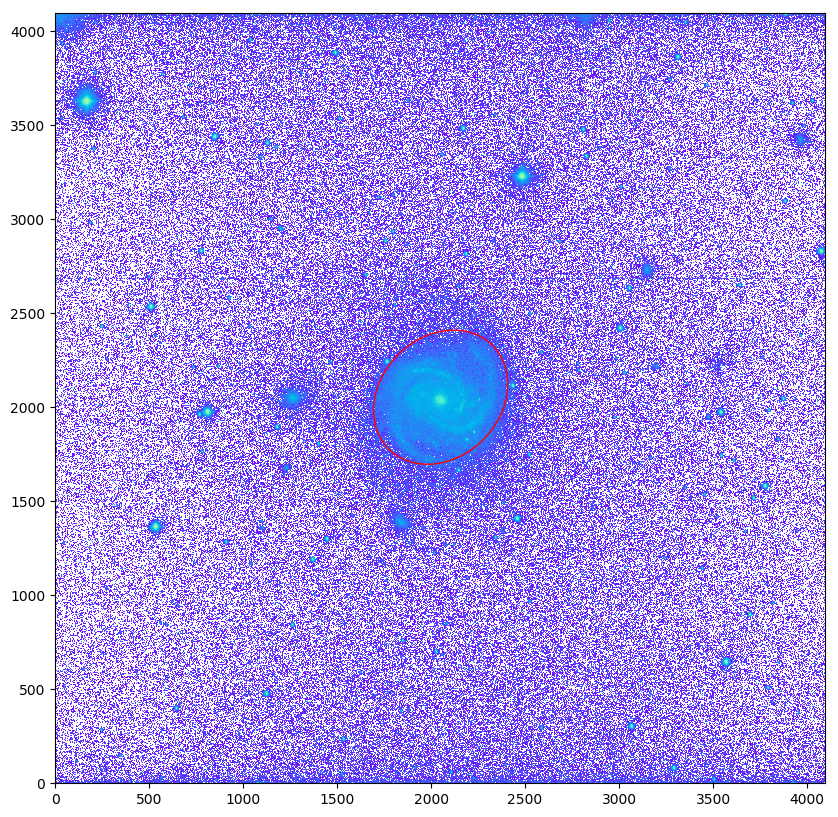

In [73]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(skyless_g_M100, norm=LogNorm(vmin=200), alpha=1.0, cmap='rainbow', origin='lower')
EllipticalAperture.plot(M100ApertureScience, color="r");